## 0 準備

In [ ]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image
np.set_printoptions(precision=8)
np.random.seed(123)

In [ ]:
!pip install japanize-matplotlib

     |████████████████████████████████| 4.1MB 3.2MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-cp37-none-any.whl size=4120276 sha256=ae24f2fb25876a6a04b5b8947b9c51adcb7787d2adc8c53f0965bec94994bf48
  Stored in directory: /root/.cache/pip/wheels/b7/d9/a2/f907d50b32a2d2008ce5d691d30fb6569c2c93eefcfde55202
Successfully built japanize-matplotlib


In [ ]:
import japanize_matplotlib
import matplotlib as mpl
font = mpl.rcParams['font.family']
sns.set(context='notebook', style='whitegrid', font=font)

---

## 1 国内感染者数の推移

In [ ]:
!wget https://www3.nhk.or.jp/n-data/opendata/coronavirus/nhk_news_covid19_domestic_daily_data.csv

--2021-06-10 00:19:56--  https://www3.nhk.or.jp/n-data/opendata/coronavirus/nhk_news_covid19_domestic_daily_data.csv
Resolving www3.nhk.or.jp (www3.nhk.or.jp)... 23.78.12.162
Connecting to www3.nhk.or.jp (www3.nhk.or.jp)|23.78.12.162|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14476 (14K) [application/x-excel]
Saving to: ‘nhk_news_covid19_domestic_daily_data.csv’

nhk_news_covid19_do 100%[===================>]  14.14K  --.-KB/s    in 0s      

2021-06-10 00:19:57 (31.8 MB/s) - ‘nhk_news_covid19_domestic_daily_data.csv’ saved [14476/14476]



In [ ]:
# df_nhk = pd.read_csv("https://www3.nhk.or.jp/n-data/opendata/coronavirus/nhk_news_covid19_domestic_daily_data.csv", delimiter=",", header=0, index_col='日付', parse_dates=True)
# df_nhk.head()

In [ ]:
df_nhk = pd.read_csv("nhk_news_covid19_domestic_daily_data.csv", delimiter=",", header=0, index_col='日付', parse_dates=True)
df_nhk.head()

,国内の感染者数_1日ごとの発表数,国内の感染者数_累計,国内の死者数_1日ごとの発表数,国内の死者数_累計
日付,,,,
2020-01-16,1,1,0,0
2020-01-17,0,1,0,0
2020-01-18,0,1,0,0
2020-01-19,0,1,0,0
2020-01-20,0,1,0,0


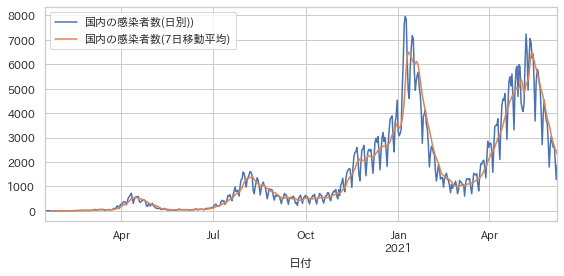

In [ ]:
df_nhk['国内の感染者数_1日ごとの発表数'].plot(figsize=(8, 4), grid=True, legend=True, label="国内の感染者数(日別))")
df_nhk['国内の感染者数_1日ごとの発表数'].rolling(7).mean().plot(figsize=(8, 4), grid=True, legend=True, label="国内の感染者数(7日移動平均)")
plt.tight_layout()

---

## 2 ダウンロード

In [ ]:
# import tarfile
# with tarfile.open('status-all-210601.tgz', 'r:gz') as tar:
#     tar.extractall()

In [ ]:
# !cat status-all.txt | grep -v "^#" | cut -f 2- | sort -n -k 1 -u | wc 
# !cat status-all.txt | grep -v "^#" | cut -f 2- | sort -n -k 1 -u > status-sorted-all.txt
# !cat status-sorted-all.txt | head -n 3
# !cat status-sorted-all.txt | cut -f 1  > _id.txt
# !cat status-sorted-all.txt | cut -f 2- > _body.txt
# !paste _body.txt _id.txt > _rev.txt
# !cat _rev.txt | grep -v -E "^RT" > rev-wort.txt
# !wc -l rev-wort.txt
# !cat rev-wort.txt | cut -f 1  > status-body.txt
# !cat rev-wort.txt | cut -f 2-6,9-11 > status-info.txt

In [ ]:
FILE_ID = "1fRhxxd_4X6FBuZnQNXY5OgWdECsWjM2p"
FILE_NAME = "covid19-all.tsv.tgz"
!curl -sc ./cookie "https://drive.google.com/uc?export=download&id={FILE_ID}" > /dev/null
CODE = !awk '/_warning_/ {print $NF}' ./cookie
!curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm={CODE[0]}&id={FILE_ID}" -o {FILE_NAME}

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0   2632      0 --:--:-- --:--:-- --:--:--  2632
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 58.3M    0 58.3M    0     0  46.7M      0 --:--:--  0:00:01 --:--:--  145M


In [ ]:
!tar zxvf covid19-all.tsv.tgz
!wc -l *.txt

status-body.txt
status-info.txt
   506339 status-body.txt
   506339 status-info.txt
  1012678 total


In [ ]:
!head -n 5 status-body.txt

#新型コロナ の影響による #登園自粛 や #保育料免除、市立幼稚園の #臨時休園 などについて順次お知らせしています。https://t.co/seW2LnnMMD 保育料の手続きは施設により異なります。ご確認ください。#浜松市 #ぴっぴ #コロナに負けない
#マスク<br>#新型コロナ<br>#非常事態宣言 <br><br>マスクが徐々に市場に溢れている。今の価格は、1枚あたり50〜80円くらい。マスク買い占めていた外国人が本国で売れなくなって在庫処分してる。病院にも徐々に入荷されている。マスク買おうとして… https://t.co/8pWlDFDaSC
#新型コロナ 佐賀県内初の #クラスター 発生　武雄のクラブ、新たに７人感染。職員も感染　#嬉野医療センター 外来休止。<br>https://t.co/4ARGCaXpQl<br>あちこちで病院関係者の感染が確認され診療に大きな影響が出てい… https://t.co/neB9e4bDb2
東京都はスーパーや商店街の混雑緩和のためとして、買い物を3日に一度にするように呼びかけました。<br><br>#東京新聞:＜#新型コロナ＞買い物「３日に一度に」　都知事、混雑緩和へ具体策:社会(TOKYO Web) https://t.co/YuwjYZzOKV
厚生労働省から4月22日付けで、通院・在宅精神療法を算定している患者さんに対して電話で指導した場合に、147点が月１回算定できる旨の通知が出されています。今までは管理料関係は算定できませんでした。https://t.co/uFN78yBud7　＃新型コロナ　＃診療報酬


In [ ]:
!head -n 5 status-info.txt

1253491152474365954	5	2	Fri Apr 24 01:09:14 +0000 2020	ja	248479481	1291	624	6179
1253492050734936064	11	2	Fri Apr 24 01:12:48 +0000 2020	ja	1231428276301615105	415	463	156
1253493010395852801	1	1	Fri Apr 24 01:16:37 +0000 2020	ja	1236199843497820160	93	405	1694
1253493727210815489	0	0	Fri Apr 24 01:19:28 +0000 2020	ja	925573152792440832	2235	166	3137
1253494414518874112	0	0	Fri Apr 24 01:22:11 +0000 2020	ja	176644442	466	165	2829


---

## 3 データ加工

### 3.1 クレンジング

In [ ]:
# df_body = pd.read_csv("status-body.txt", delimiter="\n", header=None)
body = []
for i, line in enumerate(open("status-body.txt", 'r')):
    line = line.strip()
    if line == '':
        continue
    line = line.replace(u'. . .', u'…')
    body.append(line)

df_body = pd.DataFrame(body)
df_body.columns = ["text"]
df_body["text"] = df_body["text"].str.replace("<[^>]*>", "", regex=True)
df_body["text"] = df_body["text"].str.replace("https?:\/\/[0-9a-zA-Z\!\?\+\-\_\~\=\;\.\,\*\&\@\#\$\%\(\)\'\/]+", "", regex=True)
df_body["text"] = df_body["text"].str.replace("@[0-9a-zA-Z\!\?\+\-\_\~\=\;\.\,\*\&\@\#\$\%\(\)\'\/]+", "", regex=True)
df_body["text"] = df_body["text"].str.replace("[＃#]", " ", regex=True)
df_body["text"] = df_body["text"].str.replace("[\s　]+", " ", regex=True)
df_body["text"] = df_body["text"].str.replace("\"", "", regex=False)
df_body["text"] = df_body["text"].str.strip()

df_body.head(10)

,text
0,新型コロナ の影響による 登園自粛 や 保育料免除、市立幼稚園の 臨時休園 などについて順次...
1,マスク 新型コロナ 非常事態宣言 マスクが徐々に市場に溢れている。今の価格は、1枚あたり50...
2,新型コロナ 佐賀県内初の クラスター 発生 武雄のクラブ、新たに７人感染。職員も感染 嬉野医...
3,東京都はスーパーや商店街の混雑緩和のためとして、買い物を3日に一度にするように呼びかけました...
4,厚生労働省から4月22日付けで、通院・在宅精神療法を算定している患者さんに対して電話で指導し...
5,昨日で船橋の感染確認数は100例になりました。９割以上の方は軽症や無症状です。詳細はこちらで...
6,もはや抗体検査は宝クジ 新型コロナ
7,新型コロナ モーニングショー あさイチ アベノマスク人工呼吸器に265億円ワクチンに275億...
8,新型コロナ ワクチン ニューヨークでの交代保有率がものすごく高くて、さすがにおかしい気がする...
9,マスク在庫ありシャープのマスク 希望者殺到で買えなかった人におすすめ😆こっちの方が安い1箱2...


### 3.2 MeCab + neologd インストール

In [ ]:
!apt install mecab libmecab-dev file
!git clone --depth 1 https://github.com/neologd/mecab-ipadic-neologd.git
!echo yes | mecab-ipadic-neologd/bin/install-mecab-ipadic-neologd -n
!cp /etc/mecabrc /usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd/mecabrc
!pip install fugashi ipadic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libmagic-mgc libmagic1 libmecab2 mecab-jumandic mecab-jumandic-utf8
  mecab-utils
The following NEW packages will be installed:
  file libmagic-mgc libmagic1 libmecab-dev libmecab2 mecab mecab-jumandic
  mecab-jumandic-utf8 mecab-utils
0 upgraded, 9 newly installed, 0 to remove and 39 not upgraded.
Need to get 17.1 MB of archives.
After this operation, 227 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libmagic-mgc amd64 1:5.32-2ubuntu0.4 [184 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libmagic1 amd64 1:5.32-2ubuntu0.4 [68.6 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 file amd64 1:5.32-2ubuntu0.4 [22.1 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libmecab2 amd64 0.996-5 [257 kB]
Get:5 http://archive.ubuntu.co

In [ ]:
import os, subprocess, ipadic
cmd='echo `mecab-config --dicdir`"/mecab-ipadic-neologd"'
path_neologd = (subprocess.Popen(cmd, stdout=subprocess.PIPE, shell=True).communicate()[0]).decode('utf-8').strip()
ipadic.DICDIR = path_neologd
ipadic.MECAB_ARGS = '-r "{}" -d "{}"'.format(os.path.join(ipadic.DICDIR, 'mecabrc'), ipadic.DICDIR)
print(ipadic.MECAB_ARGS)

-r "/usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd/mecabrc" -d "/usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd"


In [ ]:
from fugashi import GenericTagger
import ipadic

# m = GenericTagger(ipadic.MECAB_ARGS + " " + "-Owakati")
# m = GenericTagger(ipadic.MECAB_ARGS + " " + '--node-format="%pS%f[6]\\s" --eos-format="\\n" --unk-format="%m"')
m = GenericTagger(ipadic.MECAB_ARGS)

text = "私はフック船長が好きです。親がコロナになる。"

for word in m.parseToNodeList(text):
    print(word.surface, word.feature)

私 ('名詞', '代名詞', '一般', '*', '*', '*', '私', 'ワタシ', 'ワタシ')
は ('助詞', '係助詞', '*', '*', '*', '*', 'は', 'ハ', 'ワ')
フック船長 ('名詞', '固有名詞', '人名', '一般', '*', '*', 'フック船長', 'フックセンチョウ', 'フックセンチョー')
が ('助詞', '格助詞', '一般', '*', '*', '*', 'が', 'ガ', 'ガ')
好き ('名詞', '形容動詞語幹', '*', '*', '*', '*', '好き', 'スキ', 'スキ')
です ('助動詞', '*', '*', '*', '特殊・デス', '基本形', 'です', 'デス', 'デス')
。 ('記号', '句点', '*', '*', '*', '*', '。', '。', '。')
親 ('名詞', '一般', '*', '*', '*', '*', '親', 'オヤ', 'オヤ')
が ('助詞', '格助詞', '一般', '*', '*', '*', 'が', 'ガ', 'ガ')
コロナ ('名詞', '一般', '*', '*', '*', '*', 'コロナ', 'コロナ', 'コロナ')
に ('助詞', '格助詞', '一般', '*', '*', '*', 'に', 'ニ', 'ニ')
なる ('動詞', '自立', '*', '*', '五段・ラ行', '基本形', 'なる', 'ナル', 'ナル')
。 ('記号', '句点', '*', '*', '*', '*', '。', '。', '。')


In [ ]:
m = GenericTagger(ipadic.MECAB_ARGS)

# def mecab_tokenizer(text):
#     return m.parse(text)

def mecab_tokenizer(text):
    ret = []
    for word in m.parseToNodeList(text):
        # 品詞を選択する
        if word.feature[0] not in ['名詞','動詞','形容詞','副詞','形容動詞','未知語']:
            continue
        # 不要語を除去する
        if word.feature[0] == '名詞' and word.feature[1] == '非自立':  # 'よう'
            continue
        if word.feature[0] == '動詞' and word.feature[1] == '非自立':  # 'いる'
            continue
        if word.feature[0] == '動詞' and word.feature[1] == '接尾':    # 'られる'
            continue
        if word.feature[0] == '動詞' and word.feature[1] == '自立' and word.feature[6] in ['ある','する']:
            continue
        ret.append(word.feature[6])
    return ' '.join(ret)

In [ ]:
" ".join(df_body['text'][0:100].map(mecab_tokenizer))

'新型コロナ 影響 登 園 自粛 保育 料 免除 市立 幼稚園 臨時休園 順次 お知らせ 保育 料 手続き 施設 異なる 確認 浜松市 ぴっ * コロナに負けない マスク 新型コロナ 非常事態宣言 マスク 徐々に 市場 溢れる 今 価格 1枚 あたり * 80円 マスク 買い占める 外国人 本国 売れる なる 在庫処分 病院 徐々に 入荷 マスク 買う 新型コロナ 佐賀県内 初 CLUSTER 発生 武雄 クラブ 新た ７ 人 感染 職員 感染 嬉野医療センター 外来 休止 あちこち 病院 関係 者 感染 確認 診療 影響 出る 東京都 スーパー 商店 街 混雑 緩和 買い物 3日 一 度 呼びかける 東京新聞 新型コロナ 買い物 ３ 日 一 度 都知事 混雑 緩和 具体策 社会 TOKYO Web 厚生労働省 4月22日 付け 通院 在宅 精神療法 算定 患者 さん 電話 指導 場合 147点 月 １ 回 算定 できる 通知 出す 今 管理 料 関係 算定 できる 新型コロナ 診療報酬 昨日 船橋 感染 確認 数 * 例 なる ９ 割 軽症 症状 詳細 こちら もう 細か 個人情報 クラスター 発生 場合 具体 的 事例 開示 予防 重要 段階 思う 新型コロナ 船橋 もはや 抗体検査 宝籤 新型コロナ 新型コロナ モーニングショー あさイチ アベノマスク 人工呼吸器 * 億 円 ワクチン * 億 円 政策 能力 ０ Go * キャンペーン * 兆 * 千 億 円 非難 殺到 星浩 正気 官邸 異常 楽観 論 田崎史郎 新型コロナ ワクチン ニューヨーク 交代 保有 率 ものすごい 高い さすが おかしい クルーズ船 症候 者 割合 考える もしか 通常 コロナ 抗体 交差抗原性 模試 そうだ 通常 コロナ ワクチン 使える 希望的観測 マスク 在庫 シャープのマスク 希望者 殺到 買える 人 おすすめ こっち 安い * 箱 2600円 送料 無料 新型肺炎 新型コロナ 緊急事態宣言 新型コロナ 山梨県知事 給与 1円 5月 分 ほぼ 全額 返上 ４ ２ ４ 新型コロナ 山梨県知事 山梨 知事 拡散 愛知 名古屋駅 前 人 いる 武漢肺炎 新型コロナ 自粛 民度 検査 実施 目標 4割 保健所 負担 減 保健所 通す 検査 受ける * 根本的 誤り 厚生労働省 正

In [ ]:
df_body['mecab'] = df_body['text'].map(mecab_tokenizer)
df_body['length'] = df_body['mecab'].map(lambda x: x.split()).map(len)
df_body.head()

,text,mecab,length
0,新型コロナ の影響による 登園自粛 や 保育料免除、市立幼稚園の 臨時休園 などについて順次...,新型コロナ 影響 登 園 自粛 保育 料 免除 市立 幼稚園 臨時休園 順次 お知らせ 保育...,23
1,マスク 新型コロナ 非常事態宣言 マスクが徐々に市場に溢れている。今の価格は、1枚あたり50...,マスク 新型コロナ 非常事態宣言 マスク 徐々に 市場 溢れる 今 価格 1枚 あたり * ...,25
2,新型コロナ 佐賀県内初の クラスター 発生 武雄のクラブ、新たに７人感染。職員も感染 嬉野医...,新型コロナ 佐賀県内 初 CLUSTER 発生 武雄 クラブ 新た ７ 人 感染 職員 感染...,25
3,東京都はスーパーや商店街の混雑緩和のためとして、買い物を3日に一度にするように呼びかけました...,東京都 スーパー 商店 街 混雑 緩和 買い物 3日 一 度 呼びかける 東京新聞 新型コロ...,25
4,厚生労働省から4月22日付けで、通院・在宅精神療法を算定している患者さんに対して電話で指導し...,厚生労働省 4月22日 付け 通院 在宅 精神療法 算定 患者 さん 電話 指導 場合 14...,28


In [ ]:
print(df_body.shape)

(506339, 3)


### 3.3 重複データの除去

#### 重複除去前の推移

In [ ]:
!head -n 3 status-info.txt

1253491152474365954	5	2	Fri Apr 24 01:09:14 +0000 2020	ja	248479481	1291	624	6179
1253492050734936064	11	2	Fri Apr 24 01:12:48 +0000 2020	ja	1231428276301615105	415	463	156
1253493010395852801	1	1	Fri Apr 24 01:16:37 +0000 2020	ja	1236199843497820160	93	405	1694


In [ ]:
df_info = pd.read_csv("status-info.txt", delimiter="\t", header=None)
df_info.columns = ["tweet_id", "favorite","retweet","timestamp","lang","user_id", "follower","following","tweets"]
df_info['timestamp'] = pd.to_datetime(df_info['timestamp'], format='%a %b %d %H:%M:%S %z %Y')
df_info['index'] = df_info.index
df_info.set_index('timestamp', inplace=True)
df_info = df_info.tz_convert('Asia/Tokyo')
df_info.sort_index()

,tweet_id,favorite,retweet,lang,user_id,follower,following,tweets,index
timestamp,,,,,,,,,
2020-04-24 10:09:14+09:00,1253491152474365954,5,2,ja,248479481,1291,624,6179,0
2020-04-24 10:12:48+09:00,1253492050734936064,11,2,ja,1231428276301615105,415,463,156,1
2020-04-24 10:16:37+09:00,1253493010395852801,1,1,ja,1236199843497820160,93,405,1694,2
2020-04-24 10:19:28+09:00,1253493727210815489,0,0,ja,925573152792440832,2235,166,3137,3
2020-04-24 10:22:11+09:00,1253494414518874112,0,0,ja,176644442,466,165,2829,4
...,...,...,...,...,...,...,...,...,...
2021-06-01 14:15:00+09:00,1399595311903895553,0,0,ja,1080715395240062976,25,53,8075,506334
2021-06-01 14:16:56+09:00,1399595797532999682,0,0,ja,1353776246,2523,115,16346,506335
2021-06-01 14:16:57+09:00,1399595802746621956,0,0,ja,1173726942,2938,7,2342,506336


In [ ]:
print(df_body.shape)

(506339, 3)


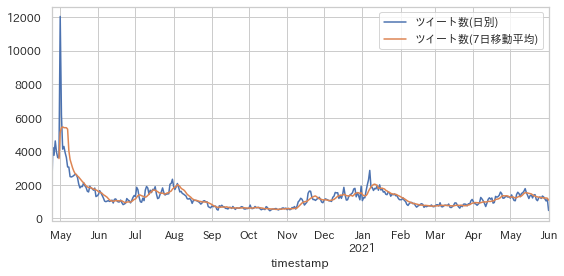

In [ ]:
df_info['lang'].resample('D').count().plot(figsize=(8, 4), grid=True, legend=True, label="ツイート数(日別)")
df_info['lang'].resample('D').count().rolling(7).mean().plot(figsize=(8, 4), grid=True, legend=True, label="ツイート数(7日移動平均)")
plt.tight_layout()

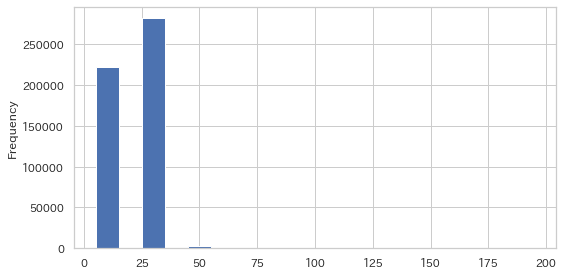

In [ ]:
df_body['length'].plot.hist(figsize=(8, 4), grid=True, range=[0,200], rwidth=0.5)
plt.tight_layout()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(max_df=0.5, min_df=1, max_features=500)
bag = count_vectorizer.fit_transform(df_body['mecab'].values)
feature_names = count_vectorizer.get_feature_names()
feature_names[0:10]

['100人', '10万人', '10円', '19', '1人', '1日', '2020年', '2021年', '2人', '3人']

In [ ]:
tf = bag.toarray().sum(axis=0)
for i in tf.argsort()[:-10:-1]:
    print(tf[i], "\t", count_vectorizer.get_feature_names()[i])

143457 	 感染
116615 	 コロナ
80235 	 新型コロナウイルス
60007 	 なる
53513 	 マスク
49851 	 確認
44463 	 19
44392 	 covid
42302 	 ワクチン


In [ ]:
df_count = pd.DataFrame(bag.toarray())
df_count.columns = feature_names
df_count.head()

,100人,10万人,10円,19,1人,1日,2020年,2021年,2人,3人,4人,4月,5人,5月,7日間,amazon,blog,cluster,covid,gt,gw,hp,japan,mmt,news,nhk,pcr,pcr検査,retweet,tokyo,tweet,virus,web,who,yahoo,あたり,あと,いい,いう,いつ,...,警戒,議員,負ける,販売,責任,起きる,超える,軽症,退院,速報,連続,週間,過ごす,過去,過去最多,違う,避ける,都内,都道府県,重症,重要,開催,開始,開発,関係,関連,防止,陰性,陽性,隔離,電子版,静岡県,韓国,頑張る,風邪,飲食,飲食店,首相,高い,高齢者
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


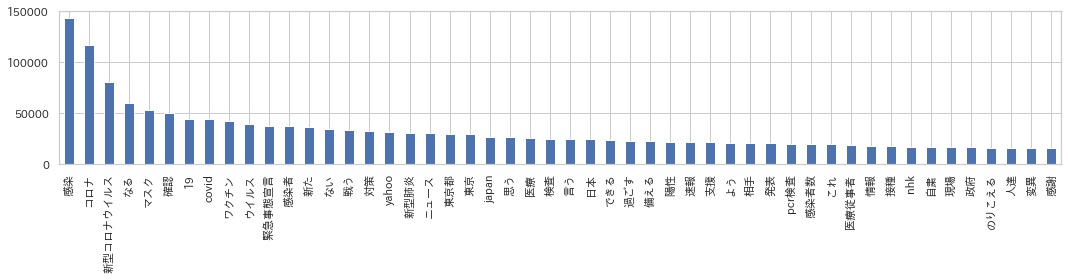

In [ ]:
df_count.sum(axis=0).sort_values(ascending=False)[0:50].plot.bar(figsize=(15, 4), grid=True)
plt.tight_layout()

In [ ]:
# np.set_printoptions(precision=10)
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_vectorizer = TfidfTransformer(use_idf=True, norm='l2', smooth_idf=True)
tfidf = tfidf_vectorizer.fit_transform(bag)
print('Shape:', tfidf.shape)
print('Number of non-zero entries:', tfidf.nnz)
print('Format:', tfidf.getformat())

Shape: (506339, 500)
Number of non-zero entries: 3417695
Format: csr


In [ ]:
df_tfidf = pd.DataFrame(tfidf.toarray())
df_tfidf.columns = feature_names
df_tfidf.head()

,100人,10万人,10円,19,1人,1日,2020年,2021年,2人,3人,4人,4月,5人,5月,7日間,amazon,blog,cluster,covid,gt,gw,hp,japan,mmt,news,nhk,pcr,pcr検査,retweet,tokyo,tweet,virus,web,who,yahoo,あたり,あと,いい,いう,いつ,...,警戒,議員,負ける,販売,責任,起きる,超える,軽症,退院,速報,連続,週間,過ごす,過去,過去最多,違う,避ける,都内,都道府県,重症,重要,開催,開始,開発,関係,関連,防止,陰性,陽性,隔離,電子版,静岡県,韓国,頑張る,風邪,飲食,飲食店,首相,高い,高齢者
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.303693,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.29888,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.344664,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.364389,0.0,0.0,0.355853,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.365043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### PCA による重複除去

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_tfidf_std = pd.DataFrame(sc.fit_transform(df_tfidf))
df_tfidf_std.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499
0,-0.077394,-0.064125,-0.159083,-0.287188,-0.119119,-0.096113,-0.137572,-0.100881,-0.095277,-0.082481,-0.075287,-0.070567,-0.076031,-0.073308,-0.070395,-0.0651,-0.073244,-0.129559,-0.287004,-0.065321,-0.06403,-0.090018,-0.168645,-0.066866,-0.09146,-0.16844,-0.077258,-0.165887,-0.068548,-0.069881,-0.068801,-0.064474,-0.075871,-0.077535,-0.191902,-0.090025,-0.074903,-0.133486,-0.105598,-0.068918,...,-0.086546,-0.062363,-0.075137,-0.073441,-0.070201,-0.068676,-0.110827,-0.065885,-0.081559,-0.168635,-0.106299,-0.093206,-0.216236,-0.065837,-0.11235,-0.079003,-0.066405,-0.083252,-0.079122,-0.150074,-0.071225,-0.090226,-0.084142,-0.075192,-0.090317,-0.115894,-0.116083,-0.074689,-0.174927,-0.074379,-0.074108,-0.070264,-0.067984,-0.071514,-0.075546,-0.068822,-0.101939,-0.066735,-0.093892,-0.091079
1,-0.077394,-0.064125,-0.159083,-0.287188,-0.119119,-0.096113,-0.137572,-0.100881,-0.095277,-0.082481,-0.075287,-0.070567,-0.076031,-0.073308,-0.070395,-0.0651,-0.073244,-0.129559,-0.287004,-0.065321,-0.06403,-0.090018,-0.168645,-0.066866,-0.09146,-0.16844,-0.077258,-0.165887,-0.068548,-0.069881,-0.068801,-0.064474,-0.075871,-0.077535,-0.191902,8.396536,-0.074903,-0.133486,-0.105598,-0.068918,...,-0.086546,-0.062363,-0.075137,-0.073441,-0.070201,-0.068676,-0.110827,-0.065885,-0.081559,-0.168635,-0.106299,-0.093206,-0.216236,-0.065837,-0.11235,-0.079003,-0.066405,-0.083252,-0.079122,-0.150074,-0.071225,-0.090226,-0.084142,-0.075192,-0.090317,-0.115894,-0.116083,-0.074689,-0.174927,-0.074379,-0.074108,-0.070264,-0.067984,-0.071514,-0.075546,-0.068822,-0.101939,-0.066735,-0.093892,-0.091079
2,-0.077394,-0.064125,-0.159083,-0.287188,-0.119119,-0.096113,-0.137572,-0.100881,-0.095277,-0.082481,-0.075287,-0.070567,-0.076031,-0.073308,-0.070395,-0.0651,-0.073244,4.911569,-0.287004,-0.065321,-0.06403,-0.090018,-0.168645,-0.066866,-0.09146,-0.16844,-0.077258,-0.165887,-0.068548,-0.069881,-0.068801,-0.064474,-0.075871,-0.077535,-0.191902,-0.090025,-0.074903,-0.133486,-0.105598,-0.068918,...,-0.086546,-0.062363,-0.075137,-0.073441,-0.070201,-0.068676,-0.110827,-0.065885,-0.081559,-0.168635,-0.106299,-0.093206,-0.216236,-0.065837,-0.11235,-0.079003,-0.066405,-0.083252,-0.079122,-0.150074,-0.071225,-0.090226,-0.084142,-0.075192,8.939904,-0.115894,-0.116083,-0.074689,-0.174927,-0.074379,-0.074108,-0.070264,-0.067984,-0.071514,-0.075546,-0.068822,-0.101939,-0.066735,-0.093892,-0.091079
3,-0.077394,-0.064125,-0.159083,-0.287188,-0.119119,-0.096113,-0.137572,-0.100881,-0.095277,-0.082481,-0.075287,-0.070567,-0.076031,-0.073308,-0.070395,-0.0651,-0.073244,-0.129559,-0.287004,-0.065321,-0.06403,-0.090018,-0.168645,-0.066866,-0.09146,-0.16844,-0.077258,-0.165887,-0.068548,9.739485,-0.068801,-0.064474,9.568757,-0.077535,-0.191902,-0.090025,-0.074903,-0.133486,-0.105598,-0.068918,...,-0.086546,-0.062363,-0.075137,-0.073441,-0.070201,-0.068676,-0.110827,-0.065885,-0.081559,-0.168635,-0.106299,-0.093206,-0.216236,-0.065837,-0.11235,-0.079003,-0.066405,-0.083252,-0.079122,-0.150074,-0.071225,-0.090226,-0.084142,-0.075192,-0.090317,-0.115894,-0.116083,-0.074689,-0.174927,-0.074379,-0.074108,-0.070264,-0.067984,-0.071514,-0.075546,-0.068822,-0.101939,-0.066735,-0.093892,-0.091079
4,-0.077394,-0.064125,-0.159083,-0.287188,-0.119119,-0.096113,-0.137572,-0.100881,-0.095277,-0.082481,-0.075287,-0.070567,-0.076031,-0.073308,-0.070395,-0.0651,-0.073244,-0.129559,-0.287004,-0.065321,-0.06403,-0.090018,-0.168645,-0.066866,-0.09146,-0.16844,-0.077258,-0.165887,-0.068548,-0.069881,-0.068801,-0.064474,-0.075871,-0.077535,-0.191902,-0.090025,-0.074903,-0.133486,-0.105598,-0.068918,...,-0.086546,-0.062363,-0.075137,-0.073441,-0.070201,-0.068676,-0.110827,-0.065885,-0.081559,-0.168635,-0.106299,-0.093206,-0.216236

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
tfidf_std_pca = pca.fit_transform(df_tfidf_std)
pca.explained_variance_ratio_

array([0.02277236, 0.01416316, 0.00704421, 0.00599811, 0.00564605,
       0.00524856, 0.00466847, 0.00447981, 0.00420621, 0.0040478 ])

In [ ]:
# from sklearn.decomposition import TruncatedSVD
# svd = TruncatedSVD(2)
# tfidf_std_svd = svd.fit_transform(df_tfidf_std)
# svd.explained_variance_ratio_

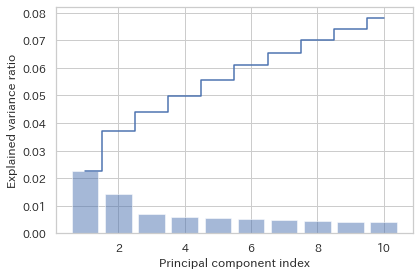

In [ ]:
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
plt.bar(range(1,11), var_exp, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1,11), cum_var_exp, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.tight_layout()

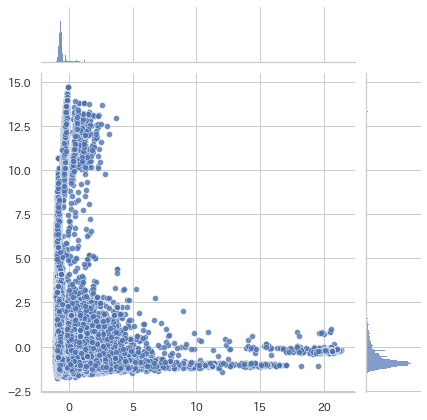

In [ ]:
sns.jointplot(x=tfidf_std_pca[:, 0], y=tfidf_std_pca[:, 1], alpha=0.8, kind='scatter')

In [ ]:
pd.DataFrame(tfidf_std_pca[:, 0]).describe()

,0
count,5.063390e+05
mean,-1.417859e-12
std,3.374345e+00
min,-1.103428e+00
25%,-7.471717e-01
50%,-6.635811e-01
75%,-5.635627e-01
max,2.136317e+01


In [ ]:
for i in tfidf_std_pca[:,0].argsort()[0:10,]:
    print(i, "\t", tfidf_std_pca[i][0], "\t", df_body.iloc[i]['mecab'])

146851 	 -1.103427832989178 	 新型コロナ 感染者 東京 急増 7月2日 感染者数 東京都 100人 超える 2か月 ぶり 水準 見通し 前日 7月1日 全国 125人 感染 確認 直近 1週間 人口 10万人 あたり 感染者数 首都圏 全域 緊急事態宣言 解除 目安 * 5人 感染 状
138110 	 -1.1025880274469075 	 新型コロナウイルス 24日 国内 新規感染者 数 89人 最多 東京都 55人 埼玉県 新た 9人 確認 直近 １ 週間 10万人 あたり 感染者数 緊急事態宣言 解除 目安 * 5人 上回る 感染 状況 チャート 日経 *
153730 	 -1.1020301418289893 	 7月7日 現在 都内 市区町村 別 直近 7日間 増加 数 平均 人口 比 状況 7日 4月 以来 最多 なる * 区 市 感染 者 確認 特に 多摩地区 感染者 明らか 増える 二 週間 前 時点 夜 街 ウイルス 広がる リスク 少し 高まる
433202 	 -1.101643482747175 	 新型コロナ 広島 1日 県内 10人 感染 確認 発表 広島市 7人 10代 90代 症状 軽症 現時点 感染経路 不明 4人 直近 1週間 人口 10万人 あたり 新規感染者 * 7人 県 警戒 基準 上回る 状態 続く
483324 	 -1.0996289269408246 	 札幌市 日5 * 検査 状況 パトランプ 陽性 率 本日 18.6% 感染経路 不明 者 数 398人 80% 重症 者 24人 前日比 3人 死亡 5人 現在 患者 数 療養 者 数 2925人 人口 10万人 あたり * 2人 上矢印
480330 	 -1.0996289269408246 	 札幌市 日5 * 検査 状況 パトランプ 陽性 率 本日 20.8% 感染経路 不明 者 数 205人 73% 重症 者 21人 前日比 2人 死亡 5人 現在 患者 数 療養 者 数 2398人 人口 10万人 あたり * 3人 上矢印
248987 	 -1.0962456241617562 	 沖縄県 3日 新型コロナ 感染 患者 1人 死亡 死亡者 47人 なる 発表 新た 感染 者 29人 確認 累計 感染者 2569人 

In [ ]:
df_body['pca'] = tfidf_std_pca[:,0]
df_body.sort_values('pca', inplace=True)
df_body.reset_index(inplace=True)
df_body['distance'] = df_body['pca'].diff()
df_body.head()

,index,text,mecab,length,pca,distance
0,146851,新型コロナ 感染者 東京急増 7月2日感染者数東京都だけで100人超え 2カ月ぶり水準見通し...,新型コロナ 感染者 東京 急増 7月2日 感染者数 東京都 100人 超える 2か月 ぶり ...,34,-1.103428,NaN
1,138110,新型コロナウイルス 24日国内新規感染者数89人最多東京都55人埼玉県新たに9人確認直近１週...,新型コロナウイルス 24日 国内 新規感染者 数 89人 最多 東京都 55人 埼玉県 新た...,30,-1.102588,0.000840
2,153730,7月7日現在の、都内市区町村別の直近7日間の増加数平均（人口比）の状況。7日は4月以来最多と...,7月7日 現在 都内 市区町村 別 直近 7日間 増加 数 平均 人口 比 状況 7日 4月...,40,-1.102030,0.000558
3,433202,新型コロナ 広島1日､県内では10人の感染確認が発表された｡ 広島市 7人 10代から90代...,新型コロナ 広島 1日 県内 10人 感染 確認 発表 広島市 7人 10代 90代 症状 ...,32,-1.101643,0.000387
4,483324,札幌市の本日5/13の検査状況。🚨陽性率 本日 18.6%🚨感染経路不明者数 398人（80...,札幌市 日5 * 検査 状況 パトランプ 陽性 率 本日 18.6% 感染経路 不明 者 数...,36,-1.099629,0.002015


In [ ]:
df_body.shape

(506339, 6)

In [ ]:
df_body[df_body['distance'] == 0].to_csv('duplicated.txt', sep="\t")

In [ ]:
# !tar zcvf duplicated.txt.tgz duplicated.txt

In [ ]:
# from google.colab import files
# files.download('duplicated.txt.tgz')

In [ ]:
df_body.drop(df_body.loc[df_body['distance'] == 0].index, inplace=True)
df_body.sort_values('index', inplace=True)
df_body.head()

,index,text,mecab,length,pca,distance
271168,0,新型コロナ の影響による 登園自粛 や 保育料免除、市立幼稚園の 臨時休園 などについて順次...,新型コロナ 影響 登 園 自粛 保育 料 免除 市立 幼稚園 臨時休園 順次 お知らせ 保育...,23,-0.652050,3.205982e-06
315142,1,マスク 新型コロナ 非常事態宣言 マスクが徐々に市場に溢れている。今の価格は、1枚あたり50...,マスク 新型コロナ 非常事態宣言 マスク 徐々に 市場 溢れる 今 価格 1枚 あたり * ...,25,-0.623187,1.865084e-06
39588,2,新型コロナ 佐賀県内初の クラスター 発生 武雄のクラブ、新たに７人感染。職員も感染 嬉野医...,新型コロナ 佐賀県内 初 CLUSTER 発生 武雄 クラブ 新た ７ 人 感染 職員 感染...,25,-0.840075,2.742139e-06
301422,3,東京都はスーパーや商店街の混雑緩和のためとして、買い物を3日に一度にするように呼びかけました...,東京都 スーパー 商店 街 混雑 緩和 買い物 3日 一 度 呼びかける 東京新聞 新型コロ...,25,-0.632203,3.079681e-06
171890,4,厚生労働省から4月22日付けで、通院・在宅精神療法を算定している患者さんに対して電話で指導し...,厚生労働省 4月22日 付け 通院 在宅 精神療法 算定 患者 さん 電話 指導 場合 14...,28,-0.714787,5.136323e-07


In [ ]:
df_body.shape

(346732, 6)

#### 重複除去後の推移

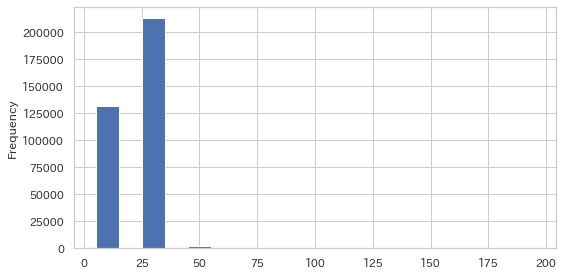

In [ ]:
df_body['length'].plot.hist(figsize=(8, 4), grid=True, range=[0,200], rwidth=0.5)
plt.tight_layout()

In [ ]:
df_info['timestamp'] = df_info.index
df_info.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 506339 entries, 2020-04-24 10:09:14+09:00 to 2021-06-01 14:19:16+09:00
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype                     
---  ------     --------------   -----                     
 0   tweet_id   506339 non-null  int64                     
 1   favorite   506339 non-null  int64                     
 2   retweet    506339 non-null  int64                     
 3   lang       506339 non-null  object                    
 4   user_id    506339 non-null  int64                     
 5   follower   506339 non-null  int64                     
 6   following  506339 non-null  int64                     
 7   tweets     506339 non-null  int64                     
 8   index      506339 non-null  int64                     
 9   timestamp  506339 non-null  datetime64[ns, Asia/Tokyo]
dtypes: datetime64[ns, Asia/Tokyo](1), int64(8), object(1)
memory usage: 42.5+ MB


In [ ]:
df_merge = pd.merge(df_body, df_info, on='index', how='inner')
df_merge.reset_index(inplace=True, drop=True)
df_merge['index'] = df_merge.index
df_merge.set_index('timestamp', inplace=True)

In [ ]:
df_merge.shape

(346732, 14)

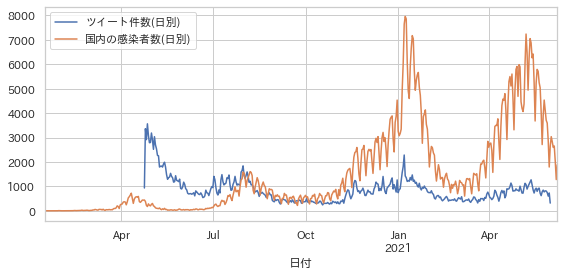

In [ ]:
df_merge['lang'].resample('D').count().plot(figsize=(8, 4), grid=True, legend=True, label="ツイート件数(日別)")
df_nhk['国内の感染者数_1日ごとの発表数'].plot(figsize=(8, 4), grid=True, legend=True, label='国内の感染者数(日別)')
plt.tight_layout()

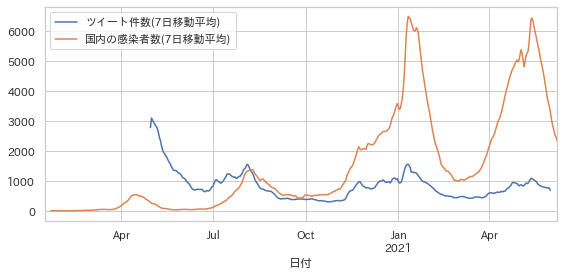

In [ ]:
df_merge['lang'].resample('D').count().rolling(7).mean().plot(figsize=(8, 4), grid=True, legend=True, label="ツイート件数(7日移動平均)")
df_nhk['国内の感染者数_1日ごとの発表数'].rolling(7).mean().plot(figsize=(8, 4), grid=True, legend=True, label='国内の感染者数(7日移動平均)')
plt.tight_layout()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer(max_df=0.5, min_df=1, max_features=500)
bag = count.fit_transform(df_body['mecab'].values)
feature_names = count.get_feature_names()
feature_names[0:10]

['100人', '19', '1人', '1日', '2020年', '2021年', '2人', '2週間', '3人', '4人']

In [ ]:
tf = bag.toarray().sum(axis=0)
for i in tf.argsort()[:-10:-1]:
    print(tf[i], "\t", count.get_feature_names()[i])

101255 	 感染
81651 	 コロナ
53039 	 なる
47839 	 新型コロナウイルス
35334 	 ワクチン
32276 	 確認
31340 	 ない
31242 	 マスク
30589 	 緊急事態宣言


In [ ]:
df_count = pd.DataFrame(bag.toarray())
df_count.columns = feature_names
df_count.head()

,100人,19,1人,1日,2020年,2021年,2人,2週間,3人,4人,4月,5人,5月,blog,cluster,covid,google,gt,gw,mmt,news,nhk,pcr,pcr検査,tokyo,tweet,web,who,yahoo,あたり,あと,いい,いう,いつ,いる,うち,お願い,かかる,かなり,ここ,...,販売,責任,起きる,超える,軽症,退院,速報,連続,週間,遅い,過ごす,過去,過去最多,違う,避ける,都内,都道府県,重症,重要,開催,開始,開発,関係,関連,防止,陰性,陽性,隔離,電子版,静岡県,韓国,頑張る,風邪,飲む,飲食,飲食店,首相,首都圏,高い,高齢者
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_count.shape

(346732, 500)

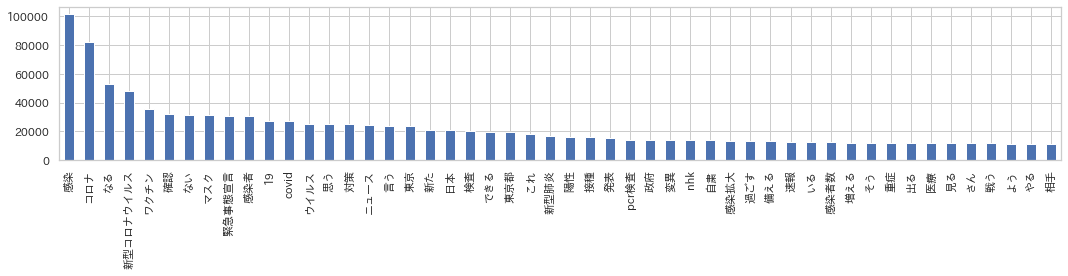

In [ ]:
df_count.sum(axis=0).sort_values(ascending=False)[0:50].plot.bar(figsize=(15, 4), grid=True)
plt.tight_layout()

### 3.4 属性の追加

--2021-06-10 00:24:04--  https://drive.google.com/uc?export=download&id=1BAGm5dVtMVd97vXJV2K8_d82j38Os73z
Resolving drive.google.com (drive.google.com)... 209.85.234.101, 209.85.234.102, 209.85.234.113, ...
Connecting to drive.google.com (drive.google.com)|209.85.234.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-00-6o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0ah3hh0p4akk0j900vu0ikqglmppfat6/1623284625000/15641968580889608874/*/1BAGm5dVtMVd97vXJV2K8_d82j38Os73z?e=download [following]
--2021-06-10 00:24:05--  https://doc-00-6o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0ah3hh0p4akk0j900vu0ikqglmppfat6/1623284625000/15641968580889608874/*/1BAGm5dVtMVd97vXJV2K8_d82j38Os73z?e=download
Resolving doc-00-6o-docs.googleusercontent.com (doc-00-6o-docs.googleusercontent.com)... 142.250.148.132, 2607:f8b0:4001:c54::84
Connecting to doc-00-6o-docs.googleusercontent.com (doc-0

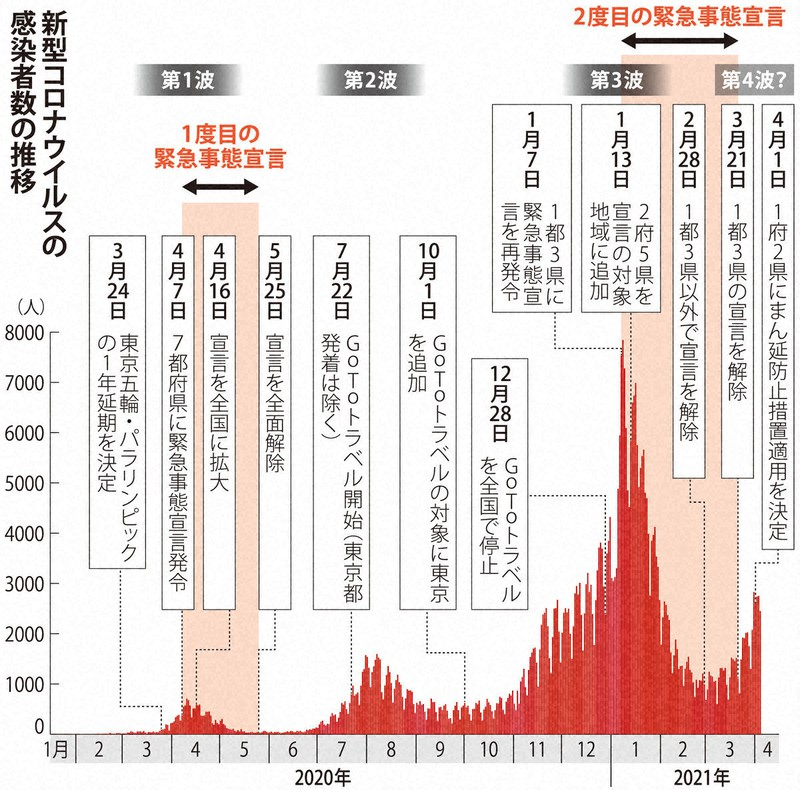

In [ ]:
FILE_ID = "1BAGm5dVtMVd97vXJV2K8_d82j38Os73z"
FILE_NAME = "9.jpeg"
!wget "https://drive.google.com/uc?export=download&id={FILE_ID}" -O {FILE_NAME}
Image(filename='9.jpeg', width=500) 

In [ ]:
df_merge.loc[:'2020-04-07', 'period1'] = '1度目の緊急事態宣言-前'
df_merge.loc['2020-04-07':'2020-05-25', 'period1'] = '1度目の緊急事態宣言-中'
df_merge.loc['2020-05-25':'2021-01-07', 'period1'] = '1度目の緊急事態宣言-後'
df_merge.loc['2021-01-07':'2021-03-21', 'period1'] = '2度目の緊急事態宣言-中'
df_merge.loc['2021-03-21':'2021-04-25', 'period1'] = '2度目の緊急事態宣言-後'
df_merge.loc['2021-04-25':, 'period1'] = '3度目の緊急事態宣言-中'
df_merge.loc[:'2020-04-01', 'period2'] = '第1波-前'
df_merge.loc['2020-04-01':'2020-05-01', 'period2'] = '第1波-中'
df_merge.loc['2020-05-01':'2020-07-01', 'period2'] = '第1波-後'
df_merge.loc['2020-07-01':'2020-09-01', 'period2'] = '第2波-中'
df_merge.loc['2020-09-01':'2020-11-01', 'period2'] = '第2波-後'
df_merge.loc['2020-11-01':'2021-03-01', 'period2'] = '第3波-中'
df_merge.loc['2021-03-01':'2021-04-01', 'period2'] = '第3波-後'
df_merge.loc['2021-04-01':, 'period2'] = '第4波-中'
df_merge.head()

,index,text,mecab,length,pca,distance,tweet_id,favorite,retweet,lang,user_id,follower,following,tweets,period1,period2
timestamp,,,,,,,,,,,,,,,,
2020-04-24 10:09:14+09:00,0,新型コロナ の影響による 登園自粛 や 保育料免除、市立幼稚園の 臨時休園 などについて順次...,新型コロナ 影響 登 園 自粛 保育 料 免除 市立 幼稚園 臨時休園 順次 お知らせ 保育...,23,-0.652050,3.205982e-06,1253491152474365954,5,2,ja,248479481,1291,624,6179,1度目の緊急事態宣言-中,第1波-中
2020-04-24 10:12:48+09:00,1,マスク 新型コロナ 非常事態宣言 マスクが徐々に市場に溢れている。今の価格は、1枚あたり50...,マスク 新型コロナ 非常事態宣言 マスク 徐々に 市場 溢れる 今 価格 1枚 あたり * ...,25,-0.623187,1.865084e-06,1253492050734936064,11,2,ja,1231428276301615105,415,463,156,1度目の緊急事態宣言-中,第1波-中
2020-04-24 10:16:37+09:00,2,新型コロナ 佐賀県内初の クラスター 発生 武雄のクラブ、新たに７人感染。職員も感染 嬉野医...,新型コロナ 佐賀県内 初 CLUSTER 発生 武雄 クラブ 新た ７ 人 感染 職員 感染...,25,-0.840075,2.742139e-06,1253493010395852801,1,1,ja,1236199843497820160,93,405,1694,1度目の緊急事態宣言-中,第1波-中
2020-04-24 10:19:28+09:00,3,東京都はスーパーや商店街の混雑緩和のためとして、買い物を3日に一度にするように呼びかけました...,東京都 スーパー 商店 街 混雑 緩和 買い物 3日 一 度 呼びかける 東京新聞 新型コロ...,25,-0.632203,3.079681e-06,1253493727210815489,0,0,ja,925573152792440832,2235,166,3137,1度目の緊急事態宣言-中,第1波-中
2020-04-24 10:22:11+09:00,4,厚生労働省から4月22日付けで、通院・在宅精神療法を算定している患者さんに対して電話で指導し...,厚生労働省 4月22日 付け 通院 在宅 精神療法 算定 患者 さん 電話 指導 場合 14...,28,-0.714787,5.136323e-07,1253494414518874112,0,0,ja,176644442,466,165,2829,1度目の緊急事態宣言-中,第1波-中


In [ ]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 346732 entries, 2020-04-24 10:09:14+09:00 to 2021-06-01 14:19:16+09:00
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   index      346732 non-null  int64  
 1   text       346732 non-null  object 
 2   mecab      346732 non-null  object 
 3   length     346732 non-null  int64  
 4   pca        346732 non-null  float64
 5   distance   346731 non-null  float64
 6   tweet_id   346732 non-null  int64  
 7   favorite   346732 non-null  int64  
 8   retweet    346732 non-null  int64  
 9   lang       346732 non-null  object 
 10  user_id    346732 non-null  int64  
 11  follower   346732 non-null  int64  
 12  following  346732 non-null  int64  
 13  tweets     346732 non-null  int64  
 14  period1    346732 non-null  object 
 15  period2    346732 non-null  object 
dtypes: float64(2), int64(9), object(5)
memory usage: 55.0+ MB


In [ ]:
df_merge.reset_index(inplace=True)
df_merge.set_index('index', inplace=True)
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 346732 entries, 0 to 346731
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype                     
---  ------     --------------   -----                     
 0   timestamp  346732 non-null  datetime64[ns, Asia/Tokyo]
 1   text       346732 non-null  object                    
 2   mecab      346732 non-null  object                    
 3   length     346732 non-null  int64                     
 4   pca        346732 non-null  float64                   
 5   distance   346731 non-null  float64                   
 6   tweet_id   346732 non-null  int64                     
 7   favorite   346732 non-null  int64                     
 8   retweet    346732 non-null  int64                     
 9   lang       346732 non-null  object                    
 10  user_id    346732 non-null  int64                     
 11  follower   346732 non-null  int64                     
 12  following  346732 non-null  int64           

In [ ]:
df_sorted = df_merge.sort_values('tweet_id', ascending=True)
df_sorted.head()

,timestamp,text,mecab,length,pca,distance,tweet_id,favorite,retweet,lang,user_id,follower,following,tweets,period1,period2
index,,,,,,,,,,,,,,,,
0,2020-04-24 10:09:14+09:00,新型コロナ の影響による 登園自粛 や 保育料免除、市立幼稚園の 臨時休園 などについて順次...,新型コロナ 影響 登 園 自粛 保育 料 免除 市立 幼稚園 臨時休園 順次 お知らせ 保育...,23,-0.652050,3.205982e-06,1253491152474365954,5,2,ja,248479481,1291,624,6179,1度目の緊急事態宣言-中,第1波-中
1,2020-04-24 10:12:48+09:00,マスク 新型コロナ 非常事態宣言 マスクが徐々に市場に溢れている。今の価格は、1枚あたり50...,マスク 新型コロナ 非常事態宣言 マスク 徐々に 市場 溢れる 今 価格 1枚 あたり * ...,25,-0.623187,1.865084e-06,1253492050734936064,11,2,ja,1231428276301615105,415,463,156,1度目の緊急事態宣言-中,第1波-中
2,2020-04-24 10:16:37+09:00,新型コロナ 佐賀県内初の クラスター 発生 武雄のクラブ、新たに７人感染。職員も感染 嬉野医...,新型コロナ 佐賀県内 初 CLUSTER 発生 武雄 クラブ 新た ７ 人 感染 職員 感染...,25,-0.840075,2.742139e-06,1253493010395852801,1,1,ja,1236199843497820160,93,405,1694,1度目の緊急事態宣言-中,第1波-中
3,2020-04-24 10:19:28+09:00,東京都はスーパーや商店街の混雑緩和のためとして、買い物を3日に一度にするように呼びかけました...,東京都 スーパー 商店 街 混雑 緩和 買い物 3日 一 度 呼びかける 東京新聞 新型コロ...,25,-0.632203,3.079681e-06,1253493727210815489,0,0,ja,925573152792440832,2235,166,3137,1度目の緊急事態宣言-中,第1波-中
4,2020-04-24 10:22:11+09:00,厚生労働省から4月22日付けで、通院・在宅精神療法を算定している患者さんに対して電話で指導し...,厚生労働省 4月22日 付け 通院 在宅 精神療法 算定 患者 さん 電話 指導 場合 14...,28,-0.714787,5.136323e-07,1253494414518874112,0,0,ja,176644442,466,165,2829,1度目の緊急事態宣言-中,第1波-中


### 3.5 10,000件サンプリング

In [ ]:
df_10000 = df_sorted.apply(lambda x: x.sample(n=10000, random_state=42))
df_10000.sort_values('tweet_id', ascending=True, inplace=True)
print(df_10000.shape)
df_10000.head()

(10000, 16)


,timestamp,text,mecab,length,pca,distance,tweet_id,favorite,retweet,lang,user_id,follower,following,tweets,period1,period2
index,,,,,,,,,,,,,,,,
7,2020-04-24 10:41:25+09:00,新型コロナ ワクチン ニューヨークでの交代保有率がものすごく高くて、さすがにおかしい気がする...,新型コロナ ワクチン ニューヨーク 交代 保有 率 ものすごい 高い さすが おかしい クル...,27,-0.724375,2.678595e-06,1253499252828864519,0,0,ja,1236849590906703875,0,16,45,1度目の緊急事態宣言-中,第1波-中
24,2020-04-24 11:58:14+09:00,新型コロナ 外出自粛 can なんかクソくらえできるかできないか、訊いてんじゃねぇやるか、や...,新型コロナ 外出自粛 * くらえる できる 訊く やる やらないか 俺 やる,10,-0.567176,1.520255e-07,1253518582996021250,0,0,ja,1239700444974215168,0,2,13,1度目の緊急事態宣言-中,第1波-中
85,2020-04-24 12:37:02+09:00,休業期間、伸びそう教育関係、人来えへんやろアホどもがパチンコ屋にたむろっとるせいでのー！だっ...,休業 期間 伸びる そう 教育 関係 人 来 アホ ども パチンコ 屋 * * おれ * 他...,25,-0.606300,8.883607e-07,1253528349634265089,0,0,ja,840367881556713472,192,320,3181,1度目の緊急事態宣言-中,第1波-中
114,2020-04-24 12:59:24+09:00,サイレントインベージョンされていた豪州も今は昔。たとえ大国の反発をまねこうとも、これだけの死...,サイレントインベージョン 豪州 今 昔 たとえ 大国 反発 まねく これだけ 死者 出す 市...,21,-0.681925,1.582812e-06,1253533976968355840,0,0,ja,1213441803975704576,25,41,143,1度目の緊急事態宣言-中,第1波-中
115,2020-04-24 13:00:10+09:00,楽天で新型コロナの検査キッドが発売されたらしいけどいいと思うすでに病院には頼れない コロナウ...,楽天 新型コロナ 検査 キッド 発売 いい 思う 素手 病院 頼れる コロナウイルス 新型コロナ,12,-0.680516,5.070220e-07,1253534170501898240,0,1,ja,983033670515609600,117,437,6367,1度目の緊急事態宣言-中,第1波-中


### 3.6 加工済みデータの書き出し

#### データの書き出し

In [ ]:
print(df_sorted.shape)
df_sorted.head()

(346732, 16)


,timestamp,text,mecab,length,pca,distance,tweet_id,favorite,retweet,lang,user_id,follower,following,tweets,period1,period2
index,,,,,,,,,,,,,,,,
0,2020-04-24 10:09:14+09:00,新型コロナ の影響による 登園自粛 や 保育料免除、市立幼稚園の 臨時休園 などについて順次...,新型コロナ 影響 登 園 自粛 保育 料 免除 市立 幼稚園 臨時休園 順次 お知らせ 保育...,23,-0.652050,3.205982e-06,1253491152474365954,5,2,ja,248479481,1291,624,6179,1度目の緊急事態宣言-中,第1波-中
1,2020-04-24 10:12:48+09:00,マスク 新型コロナ 非常事態宣言 マスクが徐々に市場に溢れている。今の価格は、1枚あたり50...,マスク 新型コロナ 非常事態宣言 マスク 徐々に 市場 溢れる 今 価格 1枚 あたり * ...,25,-0.623187,1.865084e-06,1253492050734936064,11,2,ja,1231428276301615105,415,463,156,1度目の緊急事態宣言-中,第1波-中
2,2020-04-24 10:16:37+09:00,新型コロナ 佐賀県内初の クラスター 発生 武雄のクラブ、新たに７人感染。職員も感染 嬉野医...,新型コロナ 佐賀県内 初 CLUSTER 発生 武雄 クラブ 新た ７ 人 感染 職員 感染...,25,-0.840075,2.742139e-06,1253493010395852801,1,1,ja,1236199843497820160,93,405,1694,1度目の緊急事態宣言-中,第1波-中
3,2020-04-24 10:19:28+09:00,東京都はスーパーや商店街の混雑緩和のためとして、買い物を3日に一度にするように呼びかけました...,東京都 スーパー 商店 街 混雑 緩和 買い物 3日 一 度 呼びかける 東京新聞 新型コロ...,25,-0.632203,3.079681e-06,1253493727210815489,0,0,ja,925573152792440832,2235,166,3137,1度目の緊急事態宣言-中,第1波-中
4,2020-04-24 10:22:11+09:00,厚生労働省から4月22日付けで、通院・在宅精神療法を算定している患者さんに対して電話で指導し...,厚生労働省 4月22日 付け 通院 在宅 精神療法 算定 患者 さん 電話 指導 場合 14...,28,-0.714787,5.136323e-07,1253494414518874112,0,0,ja,176644442,466,165,2829,1度目の緊急事態宣言-中,第1波-中


In [ ]:
column_names = [
'tweet_id',
'timestamp',
'text',
'favorite',
'retweet',
'lang',
'user_id',
'follower',
'following',
'tweets',
'period1',
'period2'
]

In [ ]:
df_sorted.to_csv("covid19-all.tsv", sep='\t', header=True, index=False, quoting=3, escapechar='\\', columns=column_names, date_format='%Y-%m-%d %H:%M:%S')
!rm -fr covid19-all.tsv.zip
!zip covid19-all.tsv.zip covid19-all.tsv

  adding: covid19-all.tsv (deflated 65%)


In [ ]:
!head -n 3 covid19-all.tsv

tweet_id	timestamp	text	favorite	retweet	lang	user_id	follower	following	tweets	period1	period2
1253491152474365954	2020-04-24 10:09:14	新型コロナ の影響による 登園自粛 や 保育料免除、市立幼稚園の 臨時休園 などについて順次お知らせしています。 保育料の手続きは施設により異なります。ご確認ください。 浜松市 ぴっぴ コロナに負けない	5	2	ja	248479481	1291	624	6179	1度目の緊急事態宣言-中	第1波-中
1253492050734936064	2020-04-24 10:12:48	マスク 新型コロナ 非常事態宣言 マスクが徐々に市場に溢れている。今の価格は、1枚あたり50〜80円くらい。マスク買い占めていた外国人が本国で売れなくなって在庫処分してる。病院にも徐々に入荷されている。マスク買おうとして…	11	2	ja	1231428276301615105	415	463	156	1度目の緊急事態宣言-中	第1波-中


In [ ]:
df_10000.to_csv("covid19-10000.tsv", sep='\t', header=True, index=False, quoting=3, escapechar='\\', columns=column_names, date_format='%Y-%m-%d %H:%M:%S')
!rm -fr covid19-10000.tsv.zip
!zip covid19-10000.tsv.zip covid19-10000.tsv

  adding: covid19-10000.tsv (deflated 63%)


In [ ]:
!head -n 3 covid19-10000.tsv

tweet_id	timestamp	text	favorite	retweet	lang	user_id	follower	following	tweets	period1	period2
1253499252828864519	2020-04-24 10:41:25	新型コロナ ワクチン ニューヨークでの交代保有率がものすごく高くて、さすがにおかしい気がする（クルーズ船の無症候者割合を考えると）。もしかしたら、通常のコロナの抗体と交差抗原性があるのかな？もしそうだとしたら、通常のコロナをワクチンとして使えるかもと希望的観測。	0	0	ja	1236849590906703875	0	16	45	1度目の緊急事態宣言-中	第1波-中
1253518582996021250	2020-04-24 11:58:14	新型コロナ 外出自粛 can なんかクソくらえできるかできないか、訊いてんじゃねぇやるか、やらないかだ俺はやる	0	0	ja	1239700444974215168	0	2	13	1度目の緊急事態宣言-中	第1波-中


#### データの再読み込み

In [ ]:
df_all = pd.read_csv("covid19-all.tsv", sep='\t', quoting=3, escapechar='\\')
print(df_all.shape)
df_all.head()

(346732, 12)


,tweet_id,timestamp,text,favorite,retweet,lang,user_id,follower,following,tweets,period1,period2
0,1253491152474365954,2020-04-24 10:09:14,新型コロナ の影響による 登園自粛 や 保育料免除、市立幼稚園の 臨時休園 などについて順次...,5,2,ja,248479481,1291,624,6179,1度目の緊急事態宣言-中,第1波-中
1,1253492050734936064,2020-04-24 10:12:48,マスク 新型コロナ 非常事態宣言 マスクが徐々に市場に溢れている。今の価格は、1枚あたり50...,11,2,ja,1231428276301615105,415,463,156,1度目の緊急事態宣言-中,第1波-中
2,1253493010395852801,2020-04-24 10:16:37,新型コロナ 佐賀県内初の クラスター 発生 武雄のクラブ、新たに７人感染。職員も感染 嬉野医...,1,1,ja,1236199843497820160,93,405,1694,1度目の緊急事態宣言-中,第1波-中
3,1253493727210815489,2020-04-24 10:19:28,東京都はスーパーや商店街の混雑緩和のためとして、買い物を3日に一度にするように呼びかけました...,0,0,ja,925573152792440832,2235,166,3137,1度目の緊急事態宣言-中,第1波-中
4,1253494414518874112,2020-04-24 10:22:11,厚生労働省から4月22日付けで、通院・在宅精神療法を算定している患者さんに対して電話で指導し...,0,0,ja,176644442,466,165,2829,1度目の緊急事態宣言-中,第1波-中


In [ ]:
df_all = pd.read_csv("covid19-all.tsv", sep='\t', quoting=3, escapechar='\\')
df_all['timestamp'] = pd.to_datetime(df_all['timestamp'], format='%Y-%m-%d %H:%M:%S')
df_all['index'] = df_all.index
df_all.set_index('timestamp', inplace=True)
df_all = df_all.tz_localize('Asia/Tokyo')
print(df_all.shape)
df_all.head()

(346732, 12)


,tweet_id,text,favorite,retweet,lang,user_id,follower,following,tweets,period1,period2,index
timestamp,,,,,,,,,,,,
2020-04-24 10:09:14+09:00,1253491152474365954,新型コロナ の影響による 登園自粛 や 保育料免除、市立幼稚園の 臨時休園 などについて順次...,5,2,ja,248479481,1291,624,6179,1度目の緊急事態宣言-中,第1波-中,0
2020-04-24 10:12:48+09:00,1253492050734936064,マスク 新型コロナ 非常事態宣言 マスクが徐々に市場に溢れている。今の価格は、1枚あたり50...,11,2,ja,1231428276301615105,415,463,156,1度目の緊急事態宣言-中,第1波-中,1
2020-04-24 10:16:37+09:00,1253493010395852801,新型コロナ 佐賀県内初の クラスター 発生 武雄のクラブ、新たに７人感染。職員も感染 嬉野医...,1,1,ja,1236199843497820160,93,405,1694,1度目の緊急事態宣言-中,第1波-中,2
2020-04-24 10:19:28+09:00,1253493727210815489,東京都はスーパーや商店街の混雑緩和のためとして、買い物を3日に一度にするように呼びかけました...,0,0,ja,925573152792440832,2235,166,3137,1度目の緊急事態宣言-中,第1波-中,3
2020-04-24 10:22:11+09:00,1253494414518874112,厚生労働省から4月22日付けで、通院・在宅精神療法を算定している患者さんに対して電話で指導し...,0,0,ja,176644442,466,165,2829,1度目の緊急事態宣言-中,第1波-中,4


In [ ]:
df_sample = pd.read_csv("covid19-10000.tsv", sep='\t', quoting=3, escapechar='\\')
df_sample['timestamp'] = pd.to_datetime(df_sample['timestamp'], format='%Y-%m-%d %H:%M:%S')
df_sample['index'] = df_sample.index
df_sample.set_index('timestamp', inplace=True)
df_sample = df_sample.tz_localize('Asia/Tokyo')
print(df_sample.shape)
df_sample.head()

(10000, 12)


,tweet_id,text,favorite,retweet,lang,user_id,follower,following,tweets,period1,period2,index
timestamp,,,,,,,,,,,,
2020-04-24 10:41:25+09:00,1253499252828864519,新型コロナ ワクチン ニューヨークでの交代保有率がものすごく高くて、さすがにおかしい気がする...,0,0,ja,1236849590906703875,0,16,45,1度目の緊急事態宣言-中,第1波-中,0
2020-04-24 11:58:14+09:00,1253518582996021250,新型コロナ 外出自粛 can なんかクソくらえできるかできないか、訊いてんじゃねぇやるか、や...,0,0,ja,1239700444974215168,0,2,13,1度目の緊急事態宣言-中,第1波-中,1
2020-04-24 12:37:02+09:00,1253528349634265089,休業期間、伸びそう教育関係、人来えへんやろアホどもがパチンコ屋にたむろっとるせいでのー！だっ...,0,0,ja,840367881556713472,192,320,3181,1度目の緊急事態宣言-中,第1波-中,2
2020-04-24 12:59:24+09:00,1253533976968355840,サイレントインベージョンされていた豪州も今は昔。たとえ大国の反発をまねこうとも、これだけの死...,0,0,ja,1213441803975704576,25,41,143,1度目の緊急事態宣言-中,第1波-中,3
2020-04-24 13:00:10+09:00,1253534170501898240,楽天で新型コロナの検査キッドが発売されたらしいけどいいと思うすでに病院には頼れない コロナウ...,0,1,ja,983033670515609600,117,437,6367,1度目の緊急事態宣言-中,第1波-中,4


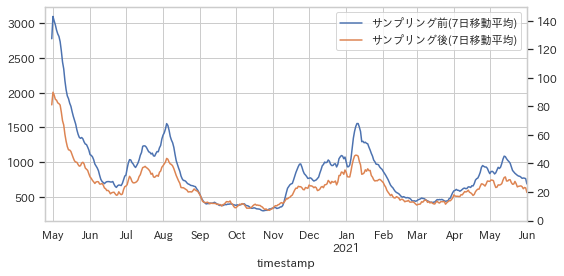

In [ ]:
fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

df_all['lang'].resample('D').count().rolling(7).mean().plot(ax=ax1, grid=True, c='C0', legend=True, label="サンプリング前(7日移動平均)")
df_sample['lang'].resample('D').count().rolling(7).mean().plot(ax=ax2, grid=False, c='C1', legend=False, label="サンプリング後(7日移動平均)")
ax2.set_ylim(0,150)
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, facecolor='white')

plt.tight_layout()

---

## 4 Google Drive へコピー

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!\cp /content/covid19-*.tsv.zip /content/drive/MyDrive/Public/gssm-202107/01-data/.
!ls -al /content/drive/MyDrive/Public/gssm-202107/01-data/

total 290490
-rw------- 1 root root   1359730 Jun 10 00:24 covid19-10000.tsv.zip
-rw------- 1 root root  44508591 Jun 10 00:24 covid19-all.tsv.zip
-rw------- 1 root root   1592642 Jun  7 23:50 rakuten-1000-2018-2019.tsv.zip
-rw------- 1 root root   1589449 Jun  7 23:50 rakuten-1000-2020-2021.tsv.zip
-rw------- 1 root root  22842099 Jun  7 23:50 rakuten-all-2018-2019.tsv.zip
-rw------- 1 root root  15545084 Jun  7 23:50 rakuten-all-2020_2021.tsv.zip
-rw------- 1 root root 210018092 Jun  7 23:50 rakuten-all.tsv.zip
drwx------ 2 root root      4096 May 16 23:39 raw
